In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint as pp
from scipy import stats
import seaborn as sns
import sklearn

In [2]:
global_cases = pd.read_csv("CONVENIENT_global_confirmed_cases.csv")
global_cases.head()

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe,Total_Cases
0,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,98
1,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,286
2,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,492
3,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,685
4,1/27/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,809


In [3]:
global_deaths = pd.read_csv('CONVENIENT_global_deaths.csv')
global_deaths.head()

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe,Total_Deaths
0,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
2,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
3,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
4,1/27/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26


In [4]:
global_meta = pd.read_csv('CONVENIENT_global_metadata.csv')
global_meta.head()

,Country/Region,Province/State,Lat,Long
0,Afghanistan,NaN,33.93911,67.709953
1,Albania,NaN,41.15330,20.168300
2,Algeria,NaN,28.03390,1.659600
3,Andorra,NaN,42.50630,1.521800
4,Angola,NaN,-11.20270,17.873900


In [5]:
vaccines = pd.read_csv('vaccinations.csv')
vaccines.head()

,location,iso_code,Date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2/22/21,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,Afghanistan,AFG,2/23/21,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
2,Afghanistan,AFG,2/24/21,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
3,Afghanistan,AFG,2/25/21,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
4,Afghanistan,AFG,2/26/21,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0


In [6]:
threshold = len(vaccines) * 0.4
vaccines = vaccines.dropna(thresh=threshold, axis='columns')
vaccines.isna().mean().to_frame()

,0
location,0.000000
iso_code,0.000000
Date,0.000000
total_vaccinations,0.419554
people_vaccinated,0.442160
people_fully_vaccinated,0.512926
daily_vaccinations_raw,0.511706
daily_vaccinations,0.006147
total_vaccinations_per_hundred,0.419554
people_vaccinated_per_hundred,0.442160


In [7]:
vaccines['Date'] = pd.to_datetime(vaccines['Date'])

In [8]:
vaccines.set_index('Date',inplace=True)
vaccines.head()

,location,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
Date,,,,,,,,,,,
2021-02-22,Afghanistan,AFG,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2021-02-23,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0
2021-02-24,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0
2021-02-25,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0
2021-02-26,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0


In [9]:
global_cases['Date'] = pd.to_datetime(global_cases['Date'])
global_cases.set_index('Date',inplace=True)
global_cases.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia.1,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe,Total_Cases
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,98
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,286
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,492
2020-01-26,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,685
2020-01-27,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,809


In [10]:
global_deaths['Date'] = pd.to_datetime(global_deaths['Date'])
global_deaths.set_index('Date',inplace=True)
global_deaths.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia.1,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe,Total_Deaths
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
2020-01-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26


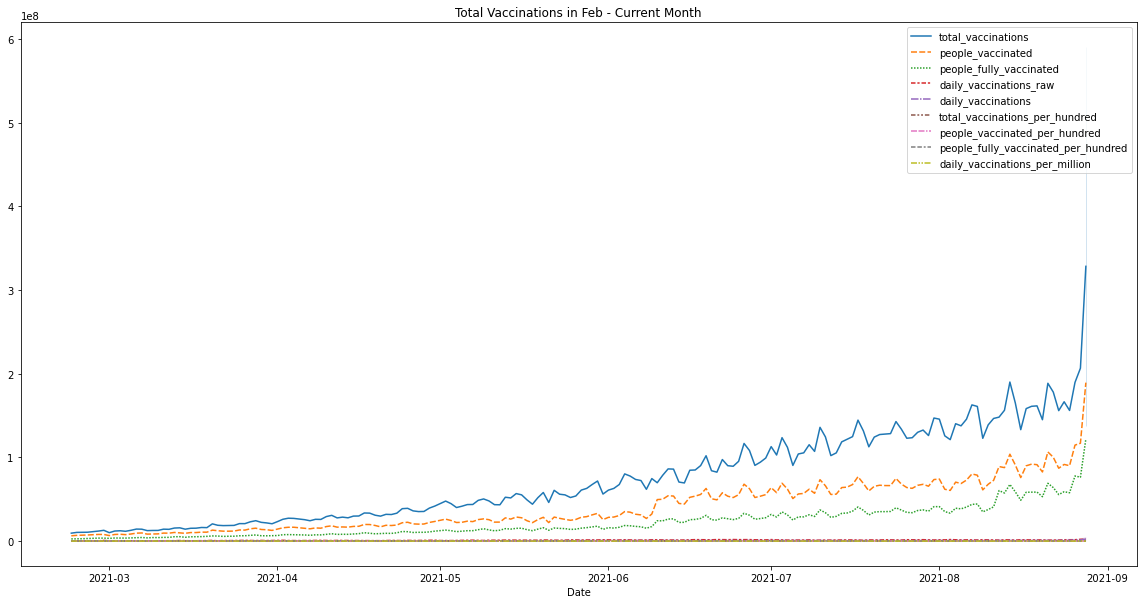

In [11]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=vaccines.loc['2021-02-22':])
plt.title('Total Vaccinations in Feb - Current Month')
plt.show()

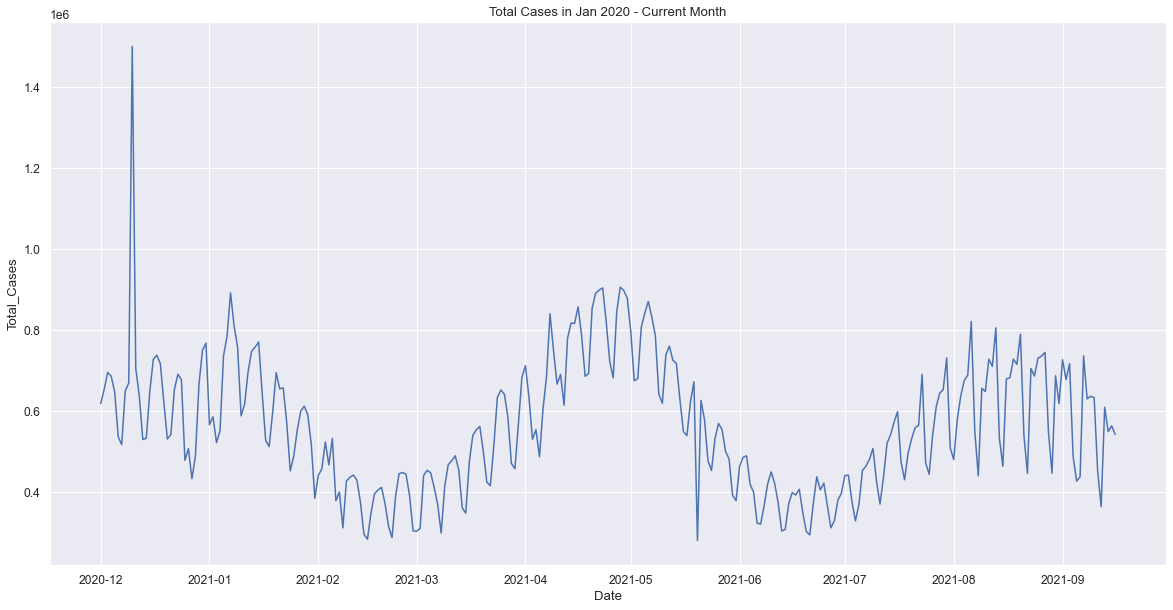

In [30]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=global_cases.Total_Cases['2020-12-01':])
plt.title('Total Cases in Jan 2020 - Current Month')
plt.show()

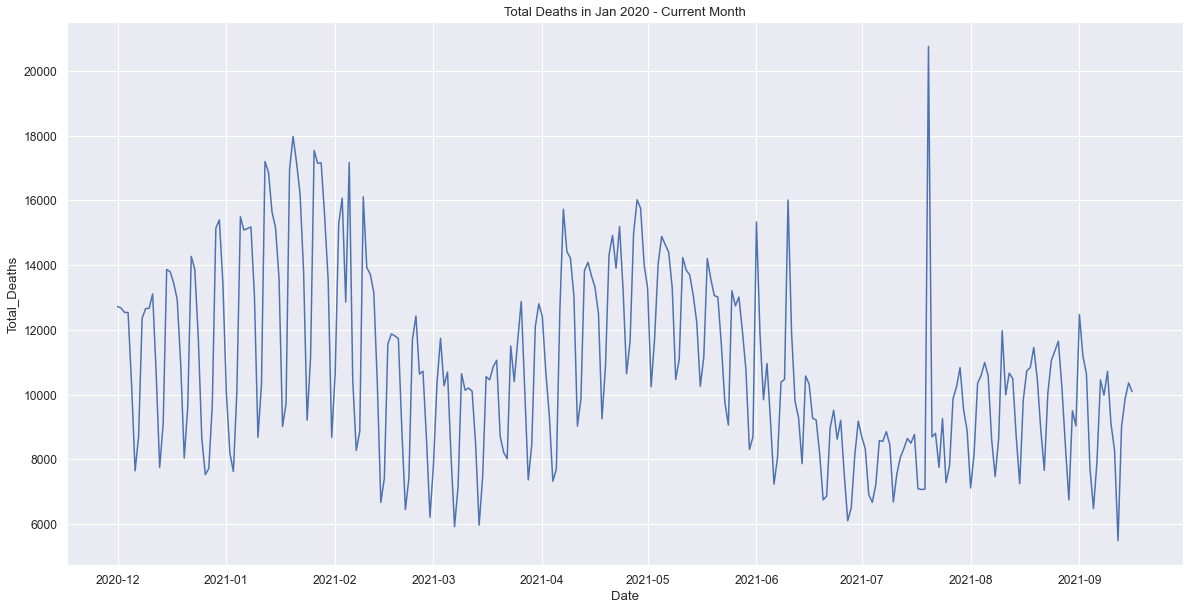

In [29]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=global_deaths.Total_Deaths['2020-12-01':])
plt.title('Total Deaths in Jan 2020 - Current Month')
plt.show()

In [14]:
dataframes = [global_cases, global_deaths, vaccines]

In [15]:
from functools import reduce

In [16]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), dataframes)

In [17]:
df_merged.head()

,Afghanistan_x,Albania_x,Algeria_x,Andorra_x,Angola_x,Antigua and Barbuda_x,Argentina_x,Armenia_x,Australia_x,Australia.1_x,...,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,0,0,0,0,0,0,0,0,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,0,0,0,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_merged = df_merged[['Total_Cases', 'Total_Deaths', 'total_vaccinations', 'people_fully_vaccinated']]

In [19]:
df_merged.head()

,Total_Cases,Total_Deaths,total_vaccinations,people_fully_vaccinated
Date,,,,
2020-01-23,98,1,NaN,NaN
2020-01-24,286,8,NaN,NaN
2020-01-25,492,16,NaN,NaN
2020-01-26,685,14,NaN,NaN
2020-01-27,809,26,NaN,NaN


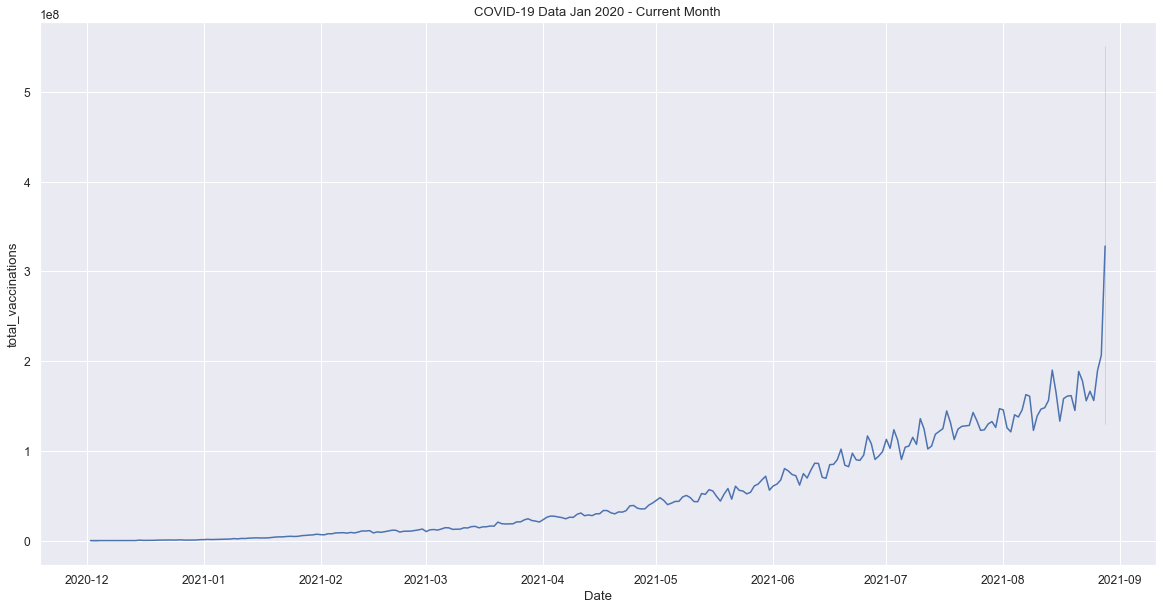

In [28]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_merged.total_vaccinations)
plt.title('COVID-19 Data Jan 2020 - Current Month')
plt.show()

In [22]:
df_merged.describe()

,Total_Cases,Total_Deaths,total_vaccinations,people_fully_vaccinated
count,4.377200e+04,43772.000000,2.521400e+04,2.115800e+04
mean,5.499920e+05,10604.127045,6.646232e+07,2.175827e+07
std,1.648423e+05,2784.375119,3.196583e+08,1.042816e+08
min,9.800000e+01,1.000000,0.000000e+00,1.000000e+00
25%,4.218470e+05,8573.000000,2.308280e+05,8.515675e+04
50%,5.311320e+05,10342.000000,1.752942e+06,7.209695e+05
75%,6.817050e+05,12603.000000,1.047914e+07,4.480053e+06
max,1.500839e+06,20756.000000,5.213176e+09,2.091593e+09


In [33]:
usa_vaccines = pd.read_csv('vaccinationsUSA.csv')

In [39]:
usa_vaccines.head()

,location,iso_code,Date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million
0,United States,USA,12/20/20,556208.0,556208.0,NaN,NaN,NaN,NaN,0.17,0.17,NaN,NaN,NaN
1,United States,USA,12/21/20,614117.0,614117.0,NaN,NaN,57909.0,57909.0,0.18,0.18,NaN,NaN,172.0
2,United States,USA,12/22/20,NaN,NaN,NaN,NaN,NaN,127432.0,NaN,NaN,NaN,NaN,379.0
3,United States,USA,12/23/20,1008025.0,1008025.0,NaN,NaN,NaN,150606.0,0.30,0.30,NaN,NaN,448.0
4,United States,USA,12/24/20,NaN,NaN,NaN,NaN,NaN,191001.0,NaN,NaN,NaN,NaN,568.0


In [42]:
usa_vaccines['Date'] = pd.to_datetime(usa_vaccines['Date'])

In [43]:
usa_vaccines.set_index('Date',inplace=True)
usa_vaccines.head()

,location,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million
Date,,,,,,,,,,,,,
2020-12-20,United States,USA,556208.0,556208.0,NaN,NaN,NaN,NaN,0.17,0.17,NaN,NaN,NaN
2020-12-21,United States,USA,614117.0,614117.0,NaN,NaN,57909.0,57909.0,0.18,0.18,NaN,NaN,172.0
2020-12-22,United States,USA,NaN,NaN,NaN,NaN,NaN,127432.0,NaN,NaN,NaN,NaN,379.0
2020-12-23,United States,USA,1008025.0,1008025.0,NaN,NaN,NaN,150606.0,0.30,0.30,NaN,NaN,448.0
2020-12-24,United States,USA,NaN,NaN,NaN,NaN,NaN,191001.0,NaN,NaN,NaN,NaN,568.0


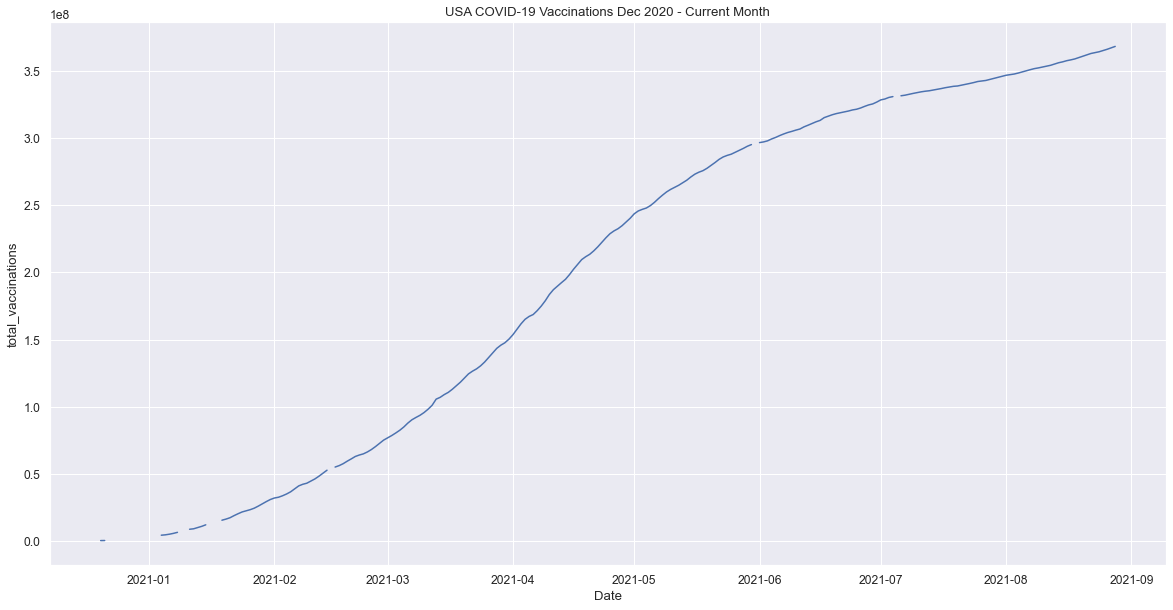

In [45]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=usa_vaccines.total_vaccinations)
plt.title('USA COVID-19 Vaccinations Dec 2020 - Current Month')
plt.show()

In [35]:
usa_cases = global_cases[['US']]

In [36]:
usa_cases.head()

,US
Date,
2020-01-23,0
2020-01-24,1
2020-01-25,0
2020-01-26,3
2020-01-27,0


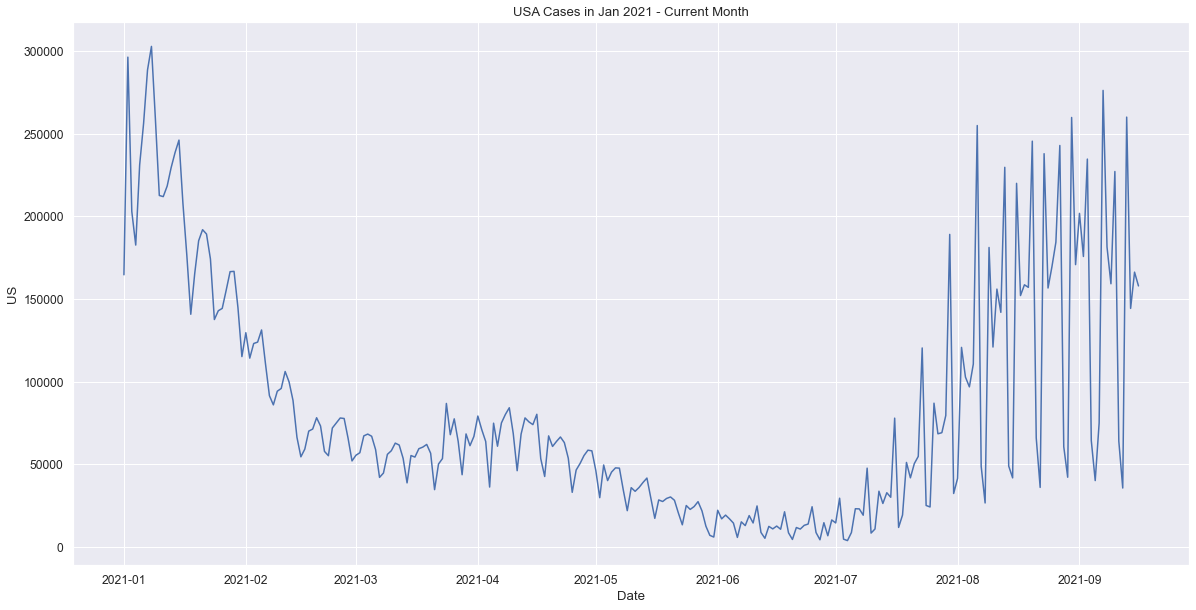

In [47]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=usa_cases.US['2021-01-01':])
plt.title('USA Cases in Jan 2021 - Current Month')
plt.show()

In [37]:
usa_deaths = global_deaths[['US']]

In [38]:
usa_deaths.head()

,US
Date,
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
2020-01-27,0


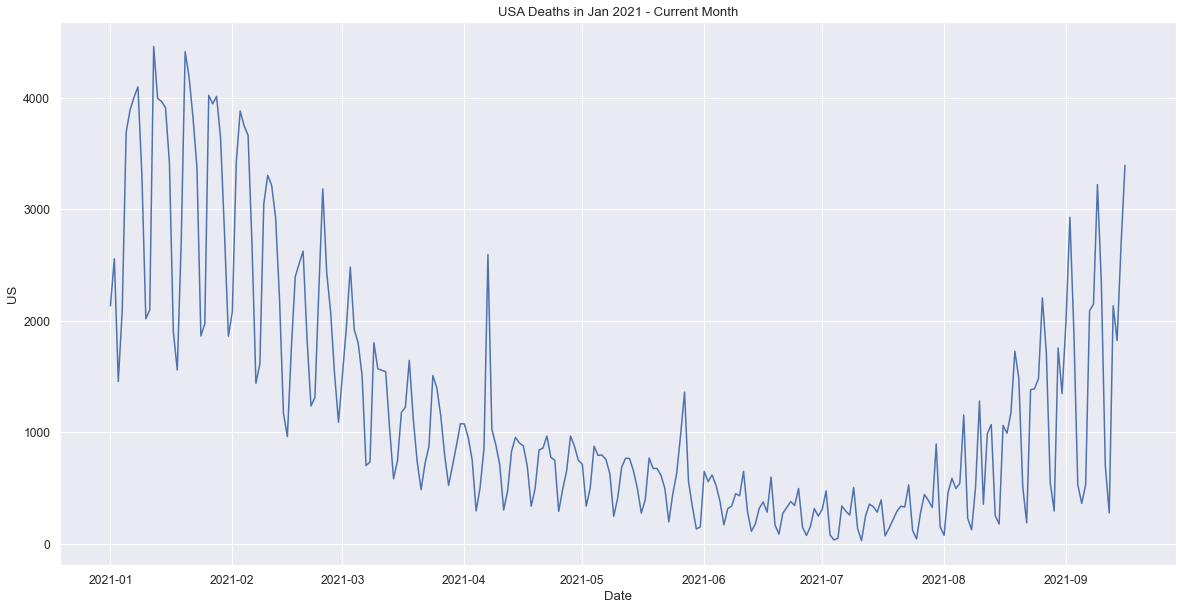

In [48]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=usa_deaths.US['2021-01-01':])
plt.title('USA Deaths in Jan 2021 - Current Month')
plt.show()